### Analyse pesticide-use in in the United States in 2014 and in 2015

In [ ]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
# from Starts.startvis import *  # Commented because of deprecated basemap-package
%matplotlib inline

In [3]:
use2014 = idata[0]
use2014.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,"2,4-D",2014,1,1,1698.6,1885.5
1,"2,4-D",2014,1,3,7513.6,8472.4
2,"2,4-D",2014,1,5,2613.6,2889.4
3,"2,4-D",2014,1,7,1259.2,1277.7
4,"2,4-D",2014,1,9,7590.5,7756.1


In [10]:
use2015 = idata[1]
use2015.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0


In [11]:
states = idata[2]
states.head()

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
0,1,1,Autauga County,AL
1,1,3,Baldwin County,AL
2,1,5,Barbour County,AL
3,1,7,Bibb County,AL
4,1,9,Blount County,AL


In [12]:
d2014_states = use2014.merge(states, how='left', on=['STATE_CODE', 'COUNTY_CODE'])
d2015_states = use2015.merge(states, how='left', on=['STATE_CODE', 'COUNTY_CODE'])

In [13]:
len(d2014_states), len(d2015_states)

(392433, 369763)

In [14]:
d2014_states.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,"2,4-D",2014,1,1,1698.6,1885.5,Autauga County,AL
1,"2,4-D",2014,1,3,7513.6,8472.4,Baldwin County,AL
2,"2,4-D",2014,1,5,2613.6,2889.4,Barbour County,AL
3,"2,4-D",2014,1,7,1259.2,1277.7,Bibb County,AL
4,"2,4-D",2014,1,9,7590.5,7756.1,Blount County,AL


In [15]:
d2015_states.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0,Baker County,OR
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1,Gilliam County,OR
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7,Hood River County,OR
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1,Morrow County,OR
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0,Sherman County,OR


In [16]:
list_of_states = states['STATE'].unique()
list_of_states

Dask Series Structure:
npartitions=1
    object
       ...
Name: STATE, dtype: object
Dask Name: unique-agg, 7 tasks

In [17]:
# Change the State to get information about pesticide-use 
# The Compound used at State AL in 2014
state='AL'
compound_al=d2014_states[d2014_states['STATE']==state]
compound_al_list = compound_al['COMPOUND'].unique()
compound_al_list

Dask Series Structure:
npartitions=1
    object
       ...
Name: COMPOUND, dtype: object
Dask Name: unique-agg, 15 tasks

In [18]:
al_cl = [(cl, len(compound_al[compound_al['COMPOUND']==cl])) for cl in compound_al_list]
al_cl    

[('2,4-D', 67),
 ('2,4-DB', 59),
 ('6-Benzyladenine', 32),
 ('Abamectin', 57),
 ('Acephate', 63),
 ('Acetochlor', 67),
 ('Acifluorfen', 57),
 ('Alachlor', 41),
 ('Aminopyralid', 67),
 ('Atrazine', 67),
 ('Azoxystrobin', 67),
 ('Bacillus Cereus', 51),
 ('Bacillus Firmus', 67),
 ('Bacillus Thuringiensis', 18),
 ('Bensulide', 24),
 ('Bentazone', 57),
 ('Bifenthrin', 67),
 ('Boscalid', 67),
 ('Bromoxynil', 22),
 ('Captan', 64),
 ('Carbaryl', 67),
 ('Carboxin', 22),
 ('Carfentrazone-Ethyl', 51),
 ('Chlorantraniliprole', 10),
 ('Chlorimuron', 65),
 ('Chloropicrin', 39),
 ('Chlorothalonil', 67),
 ('Chlorpyrifos', 67),
 ('Chlorsulfuron', 47),
 ('Clethodim', 66),
 ('Clomazone', 66),
 ('Clopyralid', 26),
 ('Cloransulam-Methyl', 65),
 ('Clothianidin', 67),
 ('Copper Hydroxide', 66),
 ('Copper Sulfate', 24),
 ('Cyclanilide', 51),
 ('Cyfluthrin', 67),
 ('Cyhalothrin-Gamma', 47),
 ('Cyhalothrin-Lambda', 67),
 ('Cypermethrin', 67),
 ('Cyproconazole', 44),
 ('Cytokinin', 51),
 ('Diazinon', 64),
 ('Dic

In [19]:
x = [a[0] for a in al_cl]
y = tuple([a[1] for a in al_cl])
df = pd.DataFrame.from_records([y], columns=x)
df

,"2,4-D","2,4-DB",6-Benzyladenine,Abamectin,Acephate,Acetochlor,Acifluorfen,Alachlor,Aminopyralid,Atrazine,...,Topramezone,Triadimenol,Tribenuron Methyl,Tribufos,Triclopyr,Trifloxystrobin,Trifloxysulfuron,Trifluralin,Zeta-Cypermethrin,Ziram
0,67,59,32,57,63,67,57,41,67,67,...,9,51,61,51,67,67,51,66,66,34


In [20]:
# The most used compound
df.idxmax(axis=1), df['2,4-D'].values

(0    2,4-D
 dtype: object, array([67], dtype=int64))

In [21]:
# The least used compound
df.idxmin(axis=1), df['Linuron'].values

(0    Linuron
 dtype: object, array([8], dtype=int64))

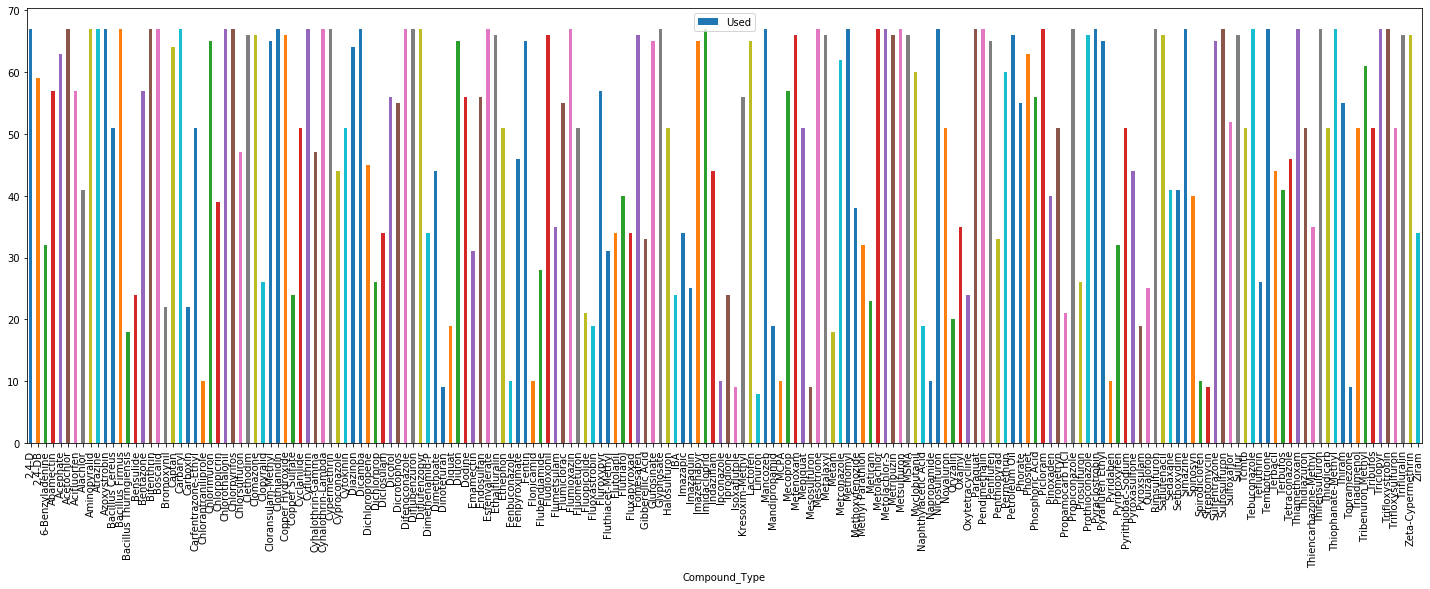

In [23]:
# Visual the used compound at State AL
df2 = pd.DataFrame(data=al_cl, columns=['Compound_Type', 'Used'])
df2.plot(x='Compound_Type', y='Used', figsize=(25,8), kind='bar')
# plt.xticks(rotation=45)